**Loading Data into R and Wrangling It**

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(rsample)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/ansonansonnn/dsci100-project/refs/heads/main/players.csv")
players_data

players_clean <- players_data|> drop_na()
players_selected <- players_clean|> select(Age, experience, subscribe)
players_selected

summary(players_selected)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Age,experience,subscribe
<dbl>,<chr>,<lgl>
9,Pro,TRUE
17,Veteran,TRUE
17,Veteran,FALSE
21,Amateur,TRUE
21,Regular,TRUE
17,Amateur,TRUE
19,Regular,TRUE
21,Amateur,FALSE
47,Amateur,TRUE


      Age         experience        subscribe      
 Min.   : 9.00   Length:194         Mode :logical  
 1st Qu.:17.00   Class :character   FALSE:52       
 Median :19.00   Mode  :character   TRUE :142      
 Mean   :21.14                                     
 3rd Qu.:22.75                                     
 Max.   :58.00                                     

**Visualization of Exploratory Analysis**

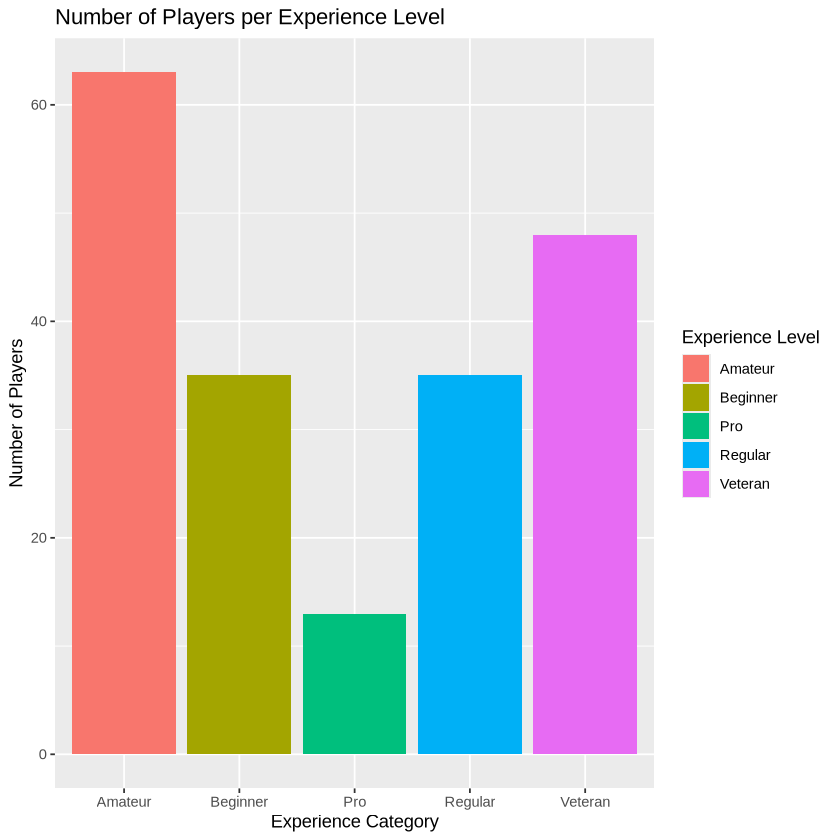

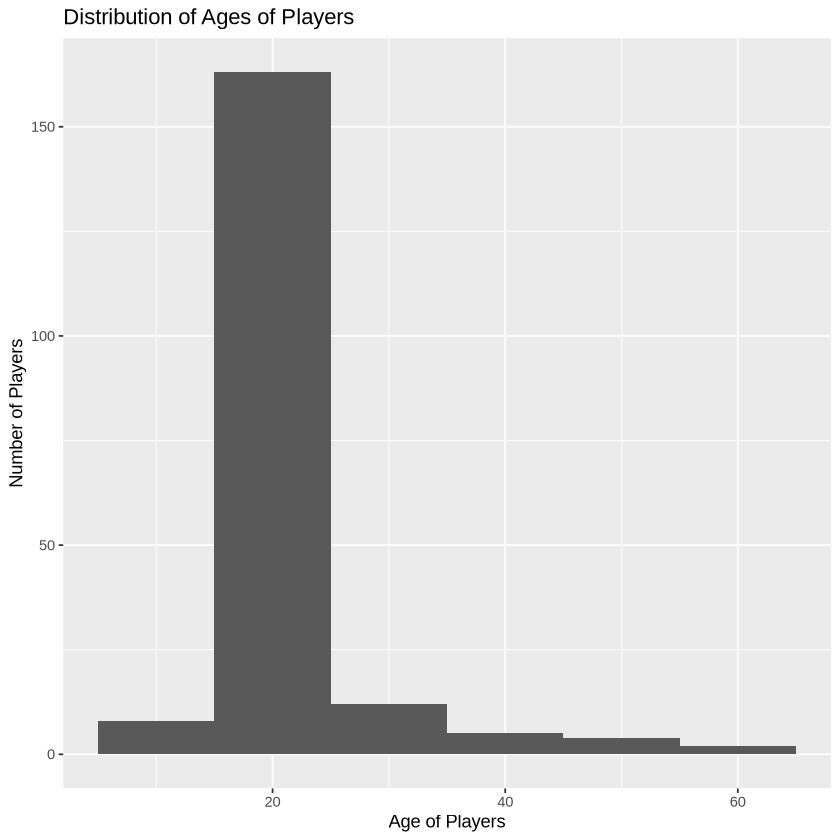

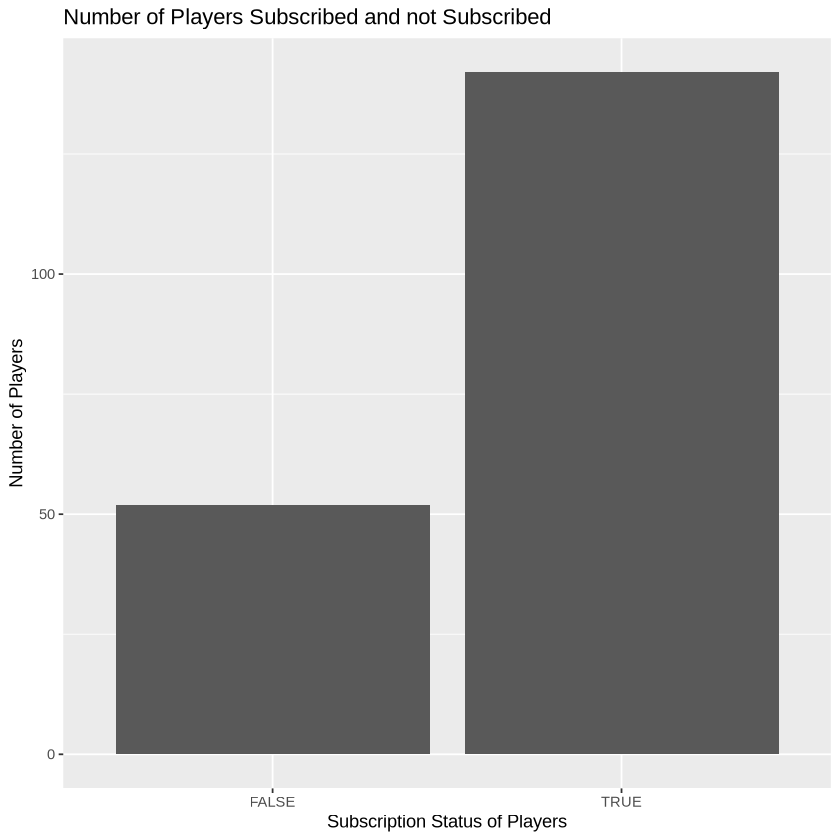

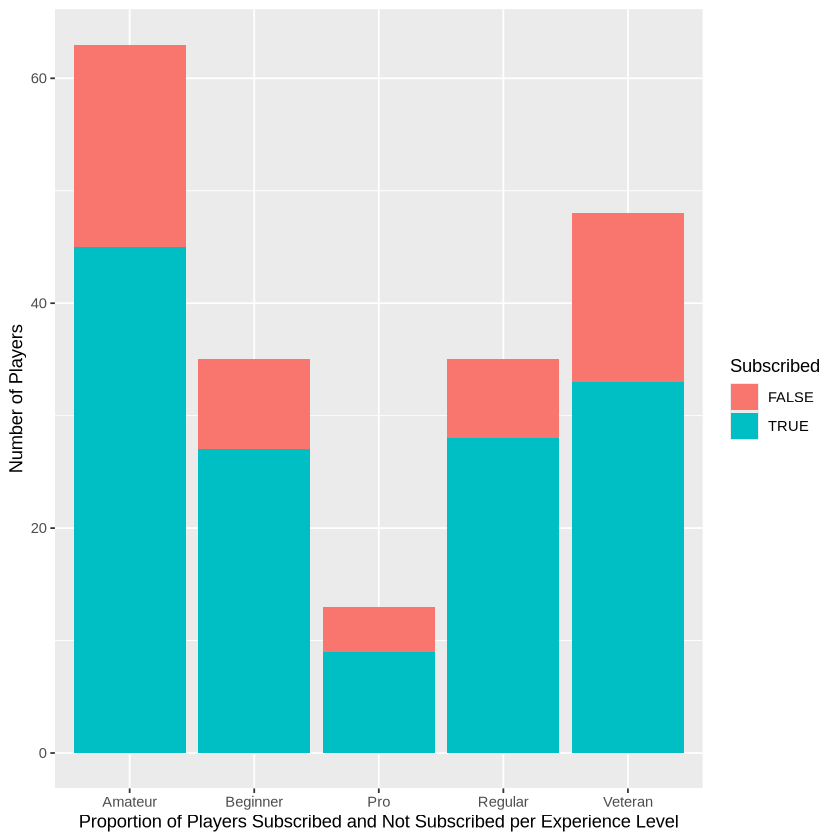

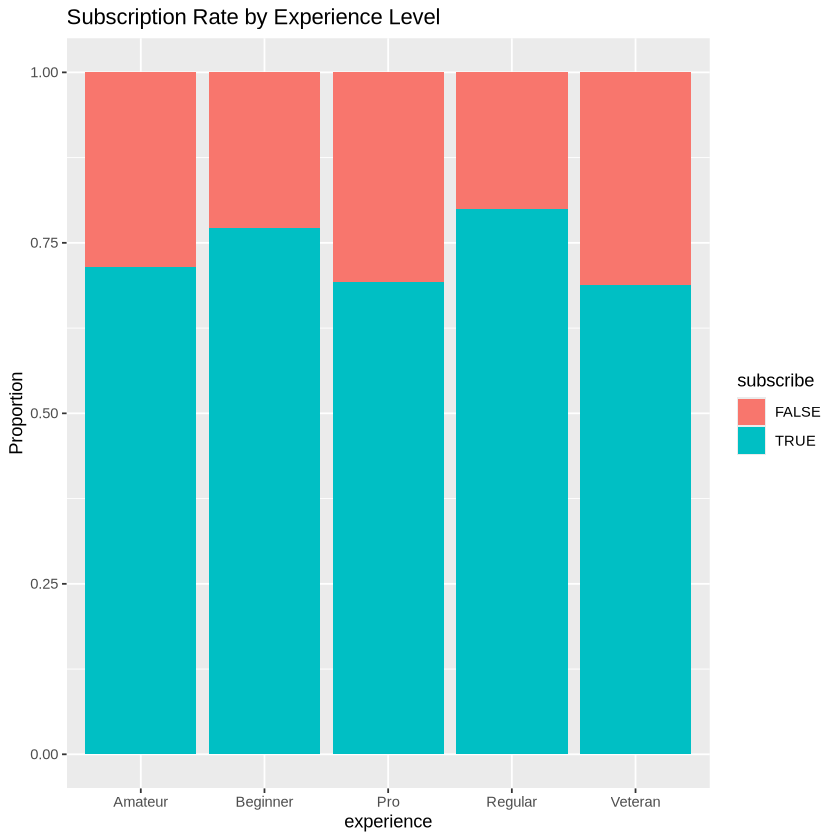

In [3]:
#1) bar plot by experience

experience_plot <- players_selected |>
    ggplot(aes(x = experience, fill = experience))+
    geom_bar(stat = "count")+
    labs(x = "Experience Category",
         y = "Number of Players",
         fill = "Experience Level",
         title = "Number of Players per Experience Level")
experience_plot

#2 distribution (histogram) by age

age_plot <- players_selected |>
    ggplot(aes(x = Age))+
    geom_histogram(binwidth = 10)+
    labs(x = "Age of Players",
         y = "Number of Players",
         title = "Distribution of Ages of Players")
age_plot

#3 bar plot of subsribtion status of players

subscribed_plot <- players_selected |>
    ggplot(aes(x = subscribe))+
    geom_bar()+
    labs(x = "Subscription Status of Players",
         y = "Number of Players",
         title = "Number of Players Subscribed and not Subscribed")
subscribed_plot

#4 bar plot of subscription status and experience proportion

subscribe_experience_plot <- players_selected |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar() +
    labs(x = "Proportion of Players Subscribed and Not Subscribed per Experience Level",
         y = "Number of Players",
         fill = "Subscribed")
subscribe_experience_plot

#5 proportional bar plot of subscription status and experience

players_selected |>
  mutate(experience = as.factor(experience)) |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Subscription Rate by Experience Level",
    y = "Proportion"
  )

**Exploratory Analysis**

In [4]:
players_summarised <- players_selected |>
    summarize( 
        mean_player_age = mean(Age),
        median_player_age = median(Age),
        min_age = min(Age),
        max_age = max(Age))
players_summarised

exp_count <- players_selected |>
    count(experience)
exp_count

sub_count <- players_selected |>
    count(subscribe)
sub_count

mean_player_age,median_player_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,19,9,58


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,13
Regular,35
Veteran,48


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,142


**Choosing Best K**

In [6]:
set.seed(123)

# Optimal K

players_selected <- players_selected |>
    filter(!is.na(experience)) |>
    mutate(
        subscribe = as.factor(subscribe),
        experience = as.numeric(factor(
            experience,
            levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")
        ))
    )

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

data_split <- initial_split(players_selected, prop = 0.7, strata = subscribe) 
    train_data <- training(data_split)
    test_data  <- testing(data_split)

knn_recipe <- recipe(subscribe ~ Age + experience, data = train_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_wf <- workflow() |>
    add_model(knn_spec) |>
    add_recipe(knn_recipe)

k_grid <- grid_regular(neighbors(range = c(1, 30)), levels = 30)

k_vfold <- vfold_cv(train_data, v = 5)

knn_tuned <- tune_grid(knn_wf, resamples = k_vfold, grid = k_grid, metrics = metric_set(accuracy))

k_select <- select_best(knn_tuned, metric = "accuracy")
k_select


neighbors,.config
<int>,<chr>
11,Preprocessor1_Model11
